<a href="https://colab.research.google.com/github/weiyuchen1213/CE888/blob/master/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
    bootstrap = np.random.choice(sample,(n_iterations,sample_size),replace = True)
    list_mean = []
    for i in range (len(bootstrap)):
      new_samples = bootstrap[i,:]
      sample_mean = np.mean(new_samples)
      list_mean.append(sample_mean)
    lower = np.percentile(list_mean, 2.5)
    upper = np.percentile(list_mean, 97.5)
    data_mean = np.mean(bootstrap)	
    return data_mean, lower, upper

(0, 100000)

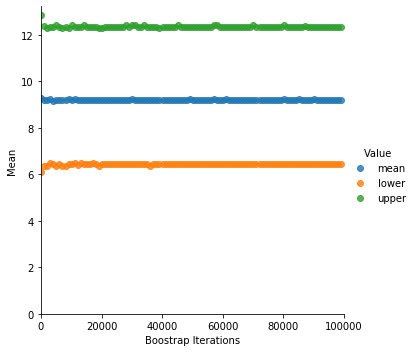

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
    bootstrap = np.random.choice(sample,(iterations,sample_size),replace = True)
    list_mean = []
    for i in range (len(bootstrap)):
      new_samples = bootstrap[i,:]
      sample_mean = np.mean(new_samples)
      list_mean.append(sample_mean)
    lower = np.percentile(list_mean, (100-ci)/2)
    upper = np.percentile(list_mean, ci+((100-ci)/2))
    data_mean = np.mean(bootstrap)
    return data_mean, lower, upper
	

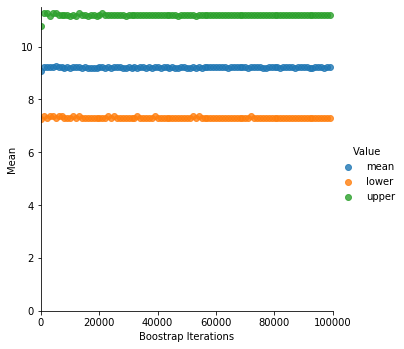

In [0]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



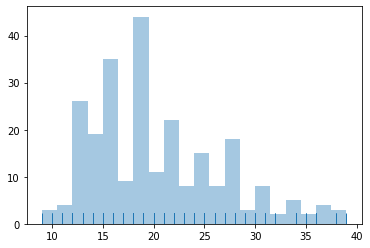

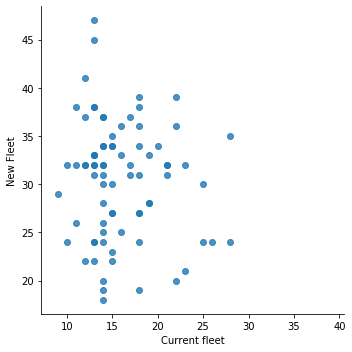

In [0]:
# Load and visualise the vehicles dataset
  df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
  data = df.values.T[1]
  datacol= df[df.columns[0]].values
  sns.distplot(datacol,bins=20,kde=False,rug=True)
  sns.lmplot(df.columns[0],df.columns[1],data=df,fit_reg=False)
# Note: you can add more cells as needed to organise your code and your plots

In [0]:
  #treat the missing values
  x = df[~np.isnan(df)]
  mean = np.mean(x)
  print(mean)

Current fleet    20.144578
New Fleet        30.481013
dtype: float64


In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

(0, 100000)

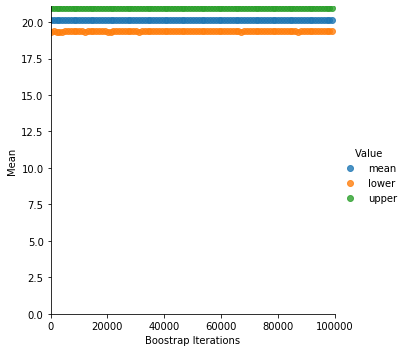

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(datacol, datacol.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

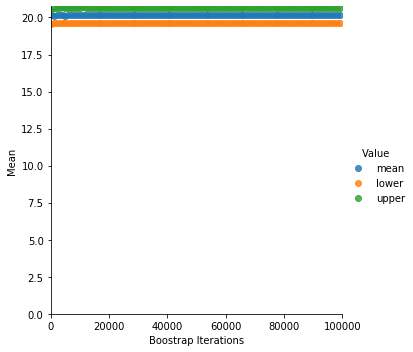

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(datacol, datacol.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [0]:
data2= datacol[np.logical_not(np.isnan(datacol))]
boots1 = []
boot1 = boostrap_mean_ci(data2, data2.shape[0], i, 80)
boots1.append([i, boot1[0], "mean"])
boots1.append([i, boot1[1], "lower"])
boots1.append([i, boot1[2], "upper"])
df_boot1 =pd.DataFrame(boots, columns=["Bootstarp Iteration", "Mean", "Value"])
print(df_boot1)

     Bootstarp Iteration       Mean  Value
0                    100  20.148514   mean
1                    100  19.567871  lower
2                    100  20.511245  upper
3                   1100  20.134863   mean
4                   1100  19.598394  lower
..                   ...        ...    ...
295                98100  19.626506  lower
296                98100  20.663052  upper
297                99100  20.142377   mean
298                99100  19.622490  lower
299                99100  20.662651  upper

[300 rows x 3 columns]


In [0]:
#permutation
concat= np.concatenate((datacol,data2))
print(concat)

[18 15 18 16 17 15 14 14 14 15 15 14 15 14 22 18 21 21 10 10 11  9 28 25
 19 16 17 19 18 14 14 14 14 12 13 13 18 22 19 18 23 26 25 20 21 13 14 15
 14 17 11 13 12 13 15 13 13 14 22 28 13 14 13 14 15 12 13 13 14 13 12 13
 18 16 18 18 23 11 12 13 12 18 21 19 21 15 16 15 11 20 21 19 15 26 25 16
 16 18 16 13 14 14 14 28 19 18 15 15 16 15 16 14 17 16 15 18 21 20 13 23
 20 23 18 19 25 26 18 16 16 15 22 22 24 23 29 25 20 18 19 18 27 13 17 13
 13 13 30 26 18 17 16 15 18 21 19 19 16 16 16 16 25 26 31 34 36 20 19 20
 19 21 20 25 21 19 21 21 19 18 19 18 18 18 30 31 23 24 22 20 22 20 21 17
 18 17 18 17 16 19 19 36 27 23 24 34 35 28 29 27 34 32 28 26 24 19 28 24
 27 27 26 24 30 39 35 34 30 22 27 20 18 28 27 34 31 29 27 24 23 38 36 25
 38 26 22 36 27 27 32 28 31 18 15 18 16 17 15 14 14 14 15 15 14 15 14 22
 18 21 21 10 10 11  9 28 25 19 16 17 19 18 14 14 14 14 12 13 13 18 22 19
 18 23 26 25 20 21 13 14 15 14 17 11 13 12 13 15 13 13 14 22 28 13 14 13
 14 15 12 13 13 14 13 12 13 18 16 18 18 23 11 12 13

In [0]:
perm= np.random.permutation(concat)
print(perm)

[25 17 21 18 34 28 16 28 12 15 19 24 18 17 14 18 19 24 19 28 29 24 31 11
 20 15 27 10 16 10 17 15 12 14 22 16 23 19 19 16 23 17 12 12 17 13 21 26
 27 21 21 16 17 34 21 18 26 14 21 12 19 24 36 15 13 30 34 13 14 11 26 19
 13 23 15 15 36 30 16 22 15 31 35 13 11 22 23 25 15 17 13 19 19 23 19 16
 16 19 11 13 34 15 36 17 14 23 18 21 20 15 18 20 13 22 29 13 13 24 16 34
 20 15 13 25 15 14 16 14  9 35 20 13 36 32 38 18 24 16 15 18 18 14 26 25
 27 17 14 21 18 22 27 13 16 22 12 25 36 38 23 22 26 13 30 16 25 14 14 27
 18 25 21 14 16 30 27 27 15 15 24 11 18 21 20 20 26 22 36 13 28 15 26 17
 26 14 12 15 28 17 25 14 23 18 18 19 15 26 18 30 28 27 16 28 31 15 25 20
 19 28 21 30 13 13 19 16 36 18 29 18 16 19 16 11 19 23 39 11 15 21 18 19
 22 16 20 24 10 18 22 30 16 13 28 19 34 18 18 13 34 22 31 23 19 18 28 20
 13 20 21 17 27 16 14 18 34 18 14 15 19 14 16 13 16 20 19 22 24 18 18 24
 27 19 14 16 24 13 16 18 19 18 18 27 13 21 22 20 15 17 25 14 26 14 15 19
 20 14 38 16 18 19 20 19 14 18 18 34 31 14 15 35 12

In [0]:
p_old= perm[:249]
print(p_old)
print(len(p_old))
p_new= perm[:79]
print(p_new)
print(len(p_new))

[25 17 21 18 34 28 16 28 12 15 19 24 18 17 14 18 19 24 19 28 29 24 31 11
 20 15 27 10 16 10 17 15 12 14 22 16 23 19 19 16 23 17 12 12 17 13 21 26
 27 21 21 16 17 34 21 18 26 14 21 12 19 24 36 15 13 30 34 13 14 11 26 19
 13 23 15 15 36 30 16 22 15 31 35 13 11 22 23 25 15 17 13 19 19 23 19 16
 16 19 11 13 34 15 36 17 14 23 18 21 20 15 18 20 13 22 29 13 13 24 16 34
 20 15 13 25 15 14 16 14  9 35 20 13 36 32 38 18 24 16 15 18 18 14 26 25
 27 17 14 21 18 22 27 13 16 22 12 25 36 38 23 22 26 13 30 16 25 14 14 27
 18 25 21 14 16 30 27 27 15 15 24 11 18 21 20 20 26 22 36 13 28 15 26 17
 26 14 12 15 28 17 25 14 23 18 18 19 15 26 18 30 28 27 16 28 31 15 25 20
 19 28 21 30 13 13 19 16 36 18 29 18 16 19 16 11 19 23 39 11 15 21 18 19
 22 16 20 24 10 18 22 30 16]
249
[25 17 21 18 34 28 16 28 12 15 19 24 18 17 14 18 19 24 19 28 29 24 31 11
 20 15 27 10 16 10 17 15 12 14 22 16 23 19 19 16 23 17 12 12 17 13 21 26
 27 21 21 16 17 34 21 18 26 14 21 12 19 24 36 15 13 30 34 13 14 11 26 19
 13 23 15 15 36 30

In [0]:
p_old_mean= np.mean(p_old)
print(p_old_mean)
p_new_mean= np.mean(p_new)
print(p_new_mean)

20.353413654618475
19.88607594936709
